Introduction:

The dataset represents midterm exam scores for multiple individuals across various questions or modules. Each row corresponds to a unique individual, and the columns represent the scores for specific questions or sections within the exam. The data includes a "Total" column, which summarizes the total marks obtained by the individual, while the other columns (like Q1aM4, Q1bM6, etc.) represent scores for specific questions, with the labels indicating the question number and maximum marks. Missing values (represented as NaN) indicate that the participant may have skipped the question or the data was not recorded. The structured format of the dataset allows for easy analysis of individual and group performance, helping identify patterns and trends in scoring.
    


In [60]:
import pandas as pd
a = pd.read_excel("MIDMARKS.xlsx")
a

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12,0,17,9,19,15
1,2.0,ALPHA,19,12,16,16,18,3
2,3.0,ALPHA,18,14,18,18,18,16
3,4.0,ALPHA,15,9,19,17,19,15
4,5.0,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
713,NaN,ZETA,19,8,8,19,17,18
714,NaN,ZETA,12,1,7,10,20,8
715,NaN,ZETA,17,6,14,14,17,18
716,NaN,ZETA,12,1,6,7,15,12


This code read the midmarks data 

In [61]:
a = a.replace('MP', 0)
a = a.replace('A', 0)
a = a.replace('AB',0)
a.fillna(0,inplace=True)
convert_dtype={
'DV':int,'M-II':int,'PP':int,'BEEE':int,'FL':int,'FIMS':int
}
a=a.astype(convert_dtype)
a

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12,0,17,9,19,15
1,2.0,ALPHA,19,12,16,16,18,3
2,3.0,ALPHA,18,14,18,18,18,16
3,4.0,ALPHA,15,9,19,17,19,15
4,5.0,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19,8,8,19,17,18
714,0.0,ZETA,12,1,7,10,20,8
715,0.0,ZETA,17,6,14,14,17,18
716,0.0,ZETA,12,1,6,7,15,12


This replaces specific string values ('MP', 'A', 'AB') in the DataFrame with 0.which may help in converting columns to numerical data types.


In [62]:
a['Total']=a['DV']+a['M-II']+a['PP']+a['BEEE']+a['FL']+a['FIMS']

In [63]:
a['Total'].median()

84.0

This code gives the median of total

In [64]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S.NO     718 non-null    float64
 1   SECTION  718 non-null    object 
 2   DV       718 non-null    int32  
 3   M-II     718 non-null    int32  
 4   PP       718 non-null    int32  
 5   BEEE     718 non-null    int32  
 6   FL       718 non-null    int32  
 7   FIMS     718 non-null    int32  
 8   Total    718 non-null    int32  
dtypes: float64(1), int32(7), object(1)
memory usage: 31.0+ KB


In [65]:
a.DV.value_counts()

20    103
17     79
16     74
18     69
15     63
19     60
11     43
12     41
14     41
13     30
10     26
9      20
0      13
6      12
5      11
8      11
7       8
2       6
4       4
1       3
3       1
Name: DV, dtype: int64

given the DV subject marks of every student and showing the count of students who scored the same marks

In [66]:
a.Total.value_counts()

103    19
81     19
86     18
82     16
84     15
       ..
40      1
22      1
30      1
38      1
5       1
Name: Total, Length: 105, dtype: int64

In [67]:
threshold = 50
filtered_data = a[a['Total'] > threshold]  
filtered_data


,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total
0,1.0,ALPHA,12,0,17,9,19,15,72
1,2.0,ALPHA,19,12,16,16,18,3,84
2,3.0,ALPHA,18,14,18,18,18,16,102
3,4.0,ALPHA,15,9,19,17,19,15,94
4,5.0,ALPHA,18,17,19,19,20,18,111
...,...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19,8,8,19,17,18,89
714,0.0,ZETA,12,1,7,10,20,8,58
715,0.0,ZETA,17,6,14,14,17,18,86
716,0.0,ZETA,12,1,6,7,15,12,53


It gives the marks who scored above 50 , here 50 is the threshold and  selecting rows where the 'Total' column is greater than 50.

In [68]:

def assign_grade(mark):
    if mark >= 90:
        return 'A'
    elif mark >= 75:
        return 'B'
    elif mark >= 50:
        return 'C'
    else:
        return 'F'

a['Grade'] = a['Total'].apply(assign_grade)  
a

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total,Grade
0,1.0,ALPHA,12,0,17,9,19,15,72,C
1,2.0,ALPHA,19,12,16,16,18,3,84,B
2,3.0,ALPHA,18,14,18,18,18,16,102,A
3,4.0,ALPHA,15,9,19,17,19,15,94,A
4,5.0,ALPHA,18,17,19,19,20,18,111,A
...,...,...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19,8,8,19,17,18,89,B
714,0.0,ZETA,12,1,7,10,20,8,58,C
715,0.0,ZETA,17,6,14,14,17,18,86,B
716,0.0,ZETA,12,1,6,7,15,12,53,C


Added a new column to classify students based on their marks and giving the grades based on condition

In [69]:
grouped_data = a.groupby('Grade')['Total'].mean()  
grouped_data

Grade
A    103.754266
B     81.987952
C     62.863905
F     32.477778
Name: Total, dtype: float64

groups the DataFrame a by the 'Grade' column and calculates the mean of the 'Total' column for each grade. It aggregates the data, providing the average 'Total' score for each unique grade value. This method helps summarize the data by giving an overview of the performance across different grade groups

In [70]:
top_5_students = a.nlargest(5, 'Total')  
top_5_students

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total,Grade
505,506.0,OMEGA,20,20,20,20,20,20,120,A
507,508.0,OMEGA,20,20,20,20,20,20,120,A
574,575.0,SIGMA,20,20,20,20,20,20,120,A
596,597.0,SIGMA,20,20,20,20,20,20,120,A
251,252.0,DELTA,20,20,20,19,20,20,119,A


Retrieves the top 5 students based on Total 

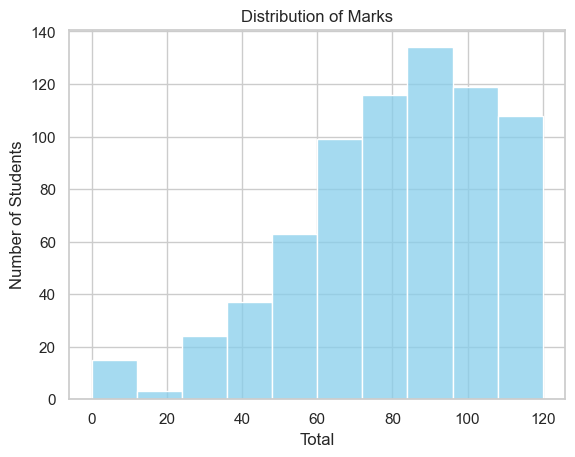

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(a['Total'], bins=10, color='skyblue', kde=False)
plt.title("Distribution of Marks")
plt.xlabel("Total")
plt.ylabel("Number of Students")
plt.show()


In [72]:
average_marks = a['Total'].mean()
below_average_students = a[a['Total'] < average_marks]  
below_average_students


,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total,Grade
0,1.0,ALPHA,12,0,17,9,19,15,72,C
20,21.0,ALPHA,4,2,5,3,16,9,39,F
25,26.0,ALPHA,6,10,10,11,13,10,60,C
27,28.0,ALPHA,5,4,3,12,13,5,42,F
29,30.0,ALPHA,8,2,11,10,13,12,56,C
...,...,...,...,...,...,...,...,...,...,...
705,0.0,ZETA,16,0,11,16,20,0,63,C
708,0.0,ZETA,18,1,10,19,16,16,80,B
710,0.0,ZETA,18,1,6,12,11,9,57,C
714,0.0,ZETA,12,1,7,10,20,8,58,C


It used to give the below average students marks

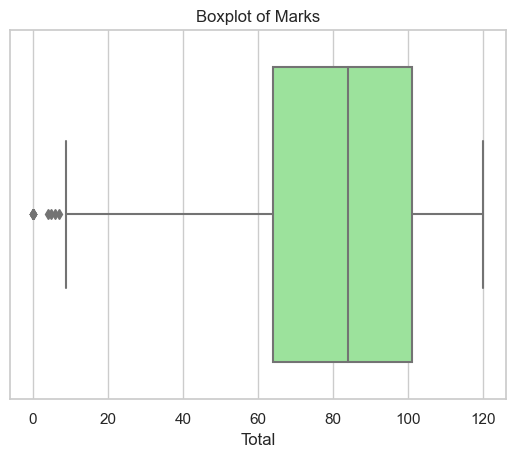

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=a['Total'], orient='h', color='lightgreen')

plt.title("Boxplot of Marks")
plt.xlabel("Total")
plt.show()


The boxplot provides insights into the central tendency and spread of the data based on total marks that is 120

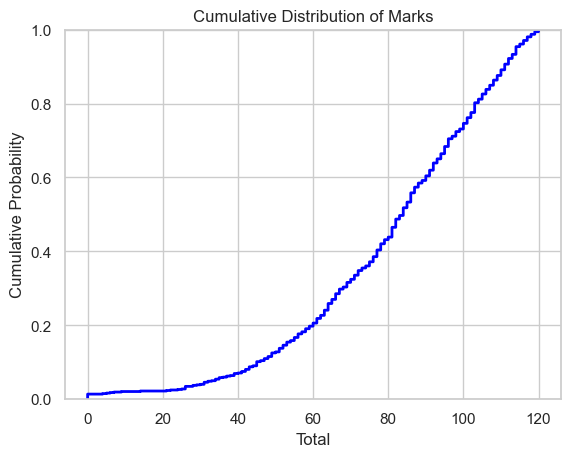

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.ecdfplot(data=a, x='Total', color='blue', linewidth=2)

plt.title("Cumulative Distribution of Marks")
plt.xlabel("Total")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.show()


The ECDF plot helps visualize how the data is distributed across different values, showing the proportion of data points less than or equal to each value. The blue step curve indicates the cumulative probability

In [75]:
random_sample = a.sample(n=10, random_state=42)
random_sample

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Total,Grade
120,121.0,BETA,10,17,14,14,20,18,93,A
331,332.0,EPSILON,17,19,16,20,20,18,110,A
39,40.0,ALPHA,20,17,20,19,20,18,114,A
637,0.0,ZETA,12,0,2,4,4,9,31,F
514,515.0,OMEGA,0,0,12,16,20,18,66,C
532,533.0,OMEGA,20,12,20,19,20,17,108,A
65,66.0,ALPHA,9,13,8,15,10,11,66,C
500,501.0,OMEGA,17,3,14,11,19,17,81,B
78,79.0,ALPHA,19,17,20,20,13,15,104,A
655,0.0,ZETA,19,3,5,10,19,13,69,C


This used to select a random sample of 10 rows from the DataFrame 

In [76]:
unique_values = a['Total'].unique()
unique_values

array([ 72,  84, 102,  94, 111,  85, 105,  82, 112, 115,  87, 109,  92,
        97,  86, 114,  39,  96, 118,  60,  42,  56,  75,  78, 103,  67,
        71, 104, 101, 106,  83, 108,  73,  66,  52,  95,  61,  88,  31,
        59,  69, 100, 117, 110,  81,  47,   4,  65,  91,  62,  90,  64,
        76,  55,  80,  93,  63,  51, 107, 116,  70,  45,  77,  54,  98,
        41,  68,  57,  40,  46,  22,  49,  30,  50,  74,  43,  79,  34,
        89,  38,  58,   0, 119,  35, 113,  53,  37,  36,  48,  28,  26,
        44,  99,  32,   9,   7,   6,  14, 120,  21,  33,  24,  25,  29,
         5])



This method is used to give the unique values from the Total column

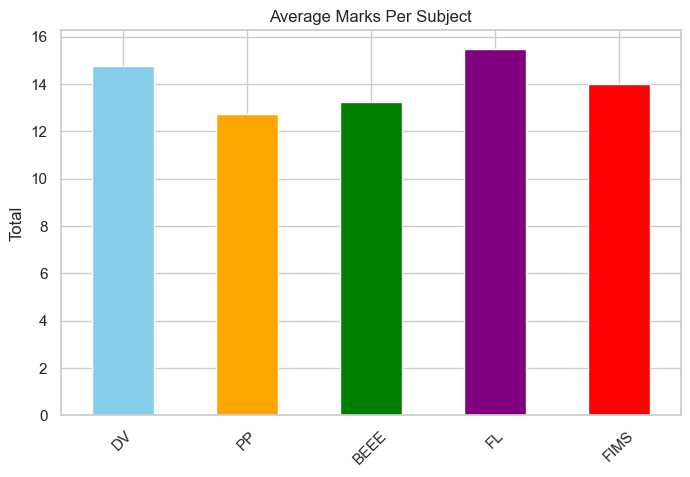

In [77]:
avg_marks = a[['DV', 'PP', 'BEEE', 'FL', 'FIMS']].mean()
avg_marks.plot(kind='bar', color=['skyblue', 'orange', 'green', 'purple', 'red'], figsize=(8, 5))
plt.title('Average Marks Per Subject')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

The bar chart shows the average marks for each subject (DV, PP, BEEE, FL, FIMS) with a distinct color for each bar. The x-axis represents the subjects, and the y-axis represents the average marks.

C:\Users\varik\AppData\Local\Temp\ipykernel_19680\3937488286.py:8: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=data, x='Subject', y='Proportion', jitter=True, size=8, palette='Set2')


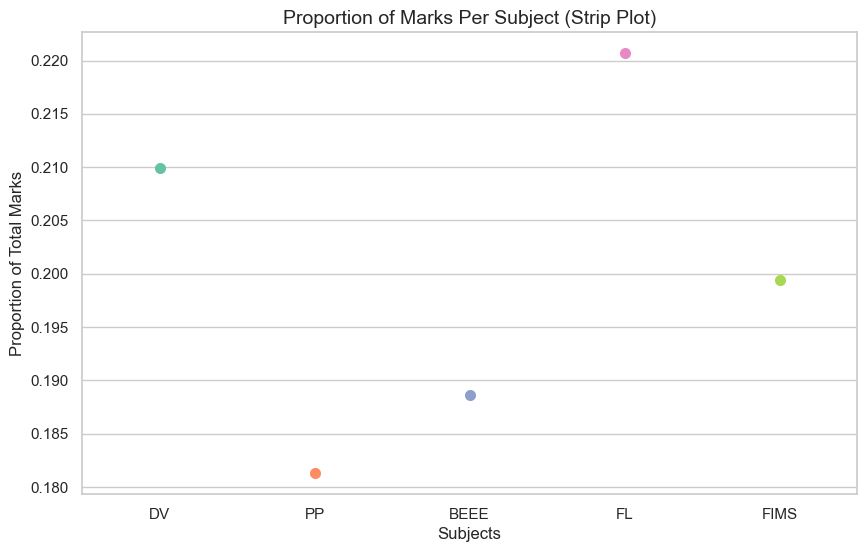

In [78]:
import seaborn as sns
import matplotlib.pyplot as pltt
total_marks = avg_marks.sum()
proportions = avg_marks / total_marks  
data = proportions.reset_index()  
data.columns = ['Subject', 'Proportion']
plt.figure(figsize=(10, 6))
sns.stripplot(data=data, x='Subject', y='Proportion', jitter=True, size=8, palette='Set2')
plt.title('Proportion of Marks Per Subject (Strip Plot)', fontsize=14)
plt.xlabel('Subjects', fontsize=12)
plt.ylabel('Proportion of Total Marks', fontsize=12)
plt.show()


The pie chart displays the proportion of average marks for each subject as a percentage of the total average marks. Each slice represents a subject, and its size reflects its contribution to the total marks. The percentages are labeled on each slice 

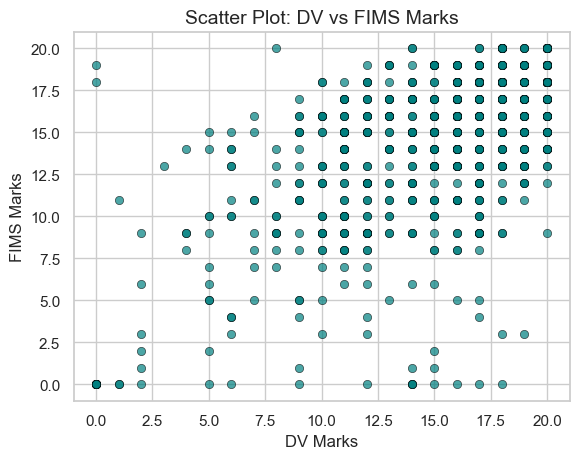

In [79]:
import seaborn as sns
sns.set_context("notebook", rc={"figure.figsize": (8, 5)})
sns.scatterplot(data=a, x='DV', y='FIMS', color='teal', alpha=0.7, edgecolor='black')
plt.title('Scatter Plot: DV vs FIMS Marks', fontsize=14)
plt.xlabel('DV Marks', fontsize=12)
plt.ylabel('FIMS Marks', fontsize=12)
sns.set_style("whitegrid")
plt.show()


The scatter plot  visually represents the relationship between the marks in the DV and FIMS subjects. Each point on the plot corresponds to a student's performance, with the x-axis representing the marks in DV and the y-axis representing the marks in FIMS. 

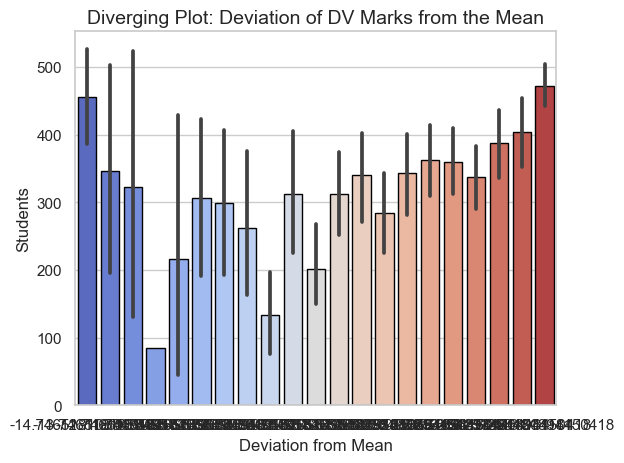

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
a['DV_deviation'] = a['DV'] - a['DV'].mean()
a_sorted = a.sort_values('DV_deviation')
sns.set_context("notebook", rc={"figure.figsize": (10, 6)})
sns.barplot(
    x='DV_deviation', 
    y=a_sorted.index, 
    data=a_sorted, 
    palette='coolwarm',  
    edgecolor='black'
)
plt.title('Diverging Plot: Deviation of DV Marks from the Mean', fontsize=14)
plt.xlabel('Deviation from Mean', fontsize=12)
plt.ylabel('Students', fontsize=12)
plt.tight_layout()
plt.show()


The histogram visually represents the distribution of marks from the DV column

In [81]:
std_dev = a[['DV', 'PP', 'BEEE', 'FL', 'FIMS']].std()
std_dev


DV      4.629339
PP      5.848171
BEEE    5.817407
FL      4.544449
FIMS    4.761238
dtype: float64

This code given the standard deviation for all subjects

In [82]:
for subject in ['DV', 'PP', 'BEEE', 'FL', 'FIMS']:
    a[f'{subject}_Rank'] = a[subject].rank(ascending=False)

a[['S.NO', 'DV_Rank', 'PP_Rank', 'BEEE_Rank', 'FL_Rank', 'FIMS_Rank']].head()


,S.NO,DV_Rank,PP_Rank,BEEE_Rank,FL_Rank,FIMS_Rank
0,1.0,540.0,223.0,542.0,216.0,376.0
1,2.0,133.5,264.5,309.5,287.5,683.5
2,3.0,198.0,178.0,191.0,287.5,297.5
3,4.0,417.0,131.5,252.0,216.0,376.0
4,5.0,198.0,131.5,133.5,95.0,141.0


The code generates a ranking for each subject (DV, PP, BEEE, FL, FIMS) based on the scores of the students. The ranks are assigned in descending order, meaning the highest marks receive the lowest rank rank 1. 

In [83]:
import pandas as pd
a = pd.read_excel("MIDMARKS.xlsx")
a

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12,0,17,9,19,15
1,2.0,ALPHA,19,12,16,16,18,3
2,3.0,ALPHA,18,14,18,18,18,16
3,4.0,ALPHA,15,9,19,17,19,15
4,5.0,ALPHA,18,17,19,19,20,18
...,...,...,...,...,...,...,...,...
713,NaN,ZETA,19,8,8,19,17,18
714,NaN,ZETA,12,1,7,10,20,8
715,NaN,ZETA,17,6,14,14,17,18
716,NaN,ZETA,12,1,6,7,15,12


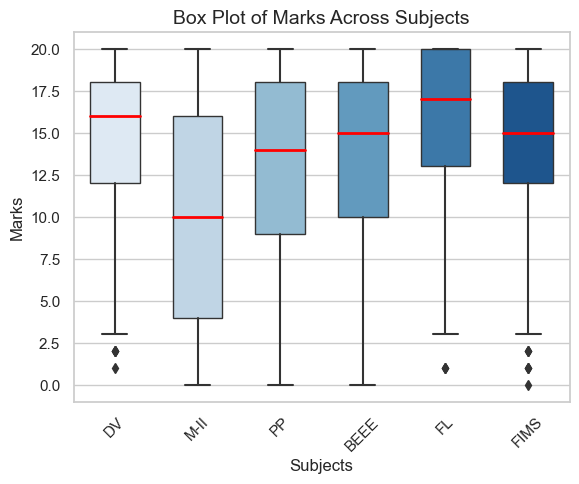

In [84]:
import seaborn as sns
import pandas as pd
columns_to_convert = ['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']
for col in columns_to_convert:
    a[col] = pd.to_numeric(a[col], errors='coerce')
a = a.dropna(subset=columns_to_convert)
a_melted = a.melt(value_vars=columns_to_convert, var_name='Subject', value_name='Marks')
sns.set_context("notebook", rc={"figure.figsize": (10, 6)})
sns.boxplot(data=a_melted, x='Subject', y='Marks', palette='Blues', width=0.6, fliersize=5, 
            boxprops=dict(linewidth=1), medianprops=dict(color='red', linewidth=2))
plt.title('Box Plot of Marks Across Subjects', fontsize=14)
plt.ylabel('Marks', fontsize=12)
plt.xlabel('Subjects', fontsize=12)
plt.xticks(rotation=45)
sns.set_style("whitegrid")
plt.show()


The box plot provides a statistical summary of marks scored across six subjects: DV, M-II, PP, BEEE, FL, and FIMS. Each box represents the interquartile range (IQR), with the bottom and top edges indicating the 25th and 75th percentiles, respectively. The horizontal red line within each box shows the median (50th percentile) of marks. 

In [85]:
a=a.fillna(0)
a


,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0
1,2.0,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0
2,3.0,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0
3,4.0,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0
4,5.0,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0
...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19.0,8.0,8.0,19.0,17.0,18.0
714,0.0,ZETA,12.0,1.0,7.0,10.0,20.0,8.0
715,0.0,ZETA,17.0,6.0,14.0,14.0,17.0,18.0
716,0.0,ZETA,12.0,1.0,6.0,7.0,15.0,12.0


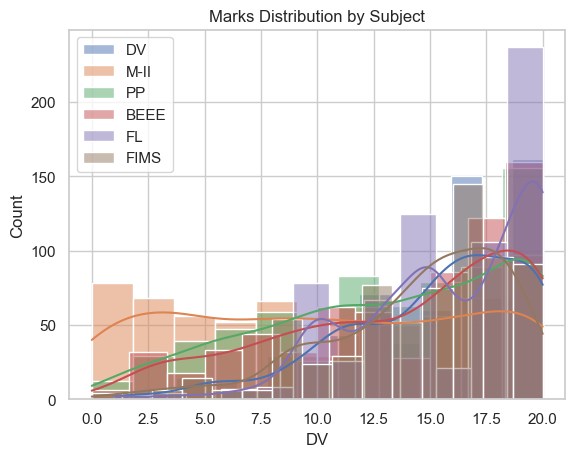

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
subjects = ['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']
for subject in subjects:
    sns.histplot(a[subject], kde=True, label=subject)
plt.legend()
plt.title("Marks Distribution by Subject")
plt.show()


The histograms for each subject ('DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS') offer an insight into the distribution of students' marks across these subjects.

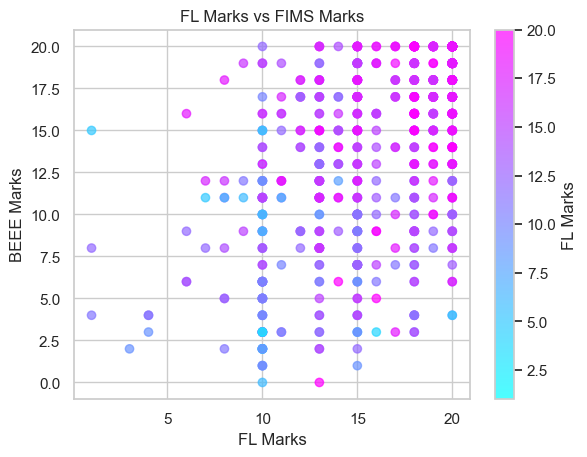

In [87]:
plt.scatter(a['FL'],a['BEEE'],c=a['DV'],cmap='cool', alpha=0.7)
plt.title("FL Marks vs FIMS Marks")
plt.xlabel("FL Marks")
plt.ylabel("BEEE Marks")
plt.colorbar(label='FL Marks')
plt.show()

The scatter plot visualizes the relationship between two sets of marks: FL Marks on the x-axis and BEEE Marks on the y-axis. Each data point represents a student or record, with its position determined by their FL and BEEE scores. 

In [88]:
full_marks_students = a[(a[columns_to_convert] == 20).any(axis=1)]
full_marks_students

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
4,5.0,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0
6,7.0,ALPHA,15.0,10.0,20.0,20.0,15.0,14.0
7,8.0,ALPHA,17.0,17.0,19.0,20.0,19.0,13.0
9,10.0,ALPHA,18.0,19.0,20.0,20.0,20.0,15.0
10,11.0,ALPHA,17.0,18.0,20.0,18.0,20.0,18.0
...,...,...,...,...,...,...,...,...
703,0.0,ZETA,16.0,6.0,15.0,17.0,20.0,16.0
709,0.0,ZETA,19.0,17.0,12.0,17.0,20.0,16.0
711,0.0,ZETA,18.0,9.0,12.0,20.0,16.0,16.0
714,0.0,ZETA,12.0,1.0,7.0,10.0,20.0,8.0


The analysis identified students who scored full marks (20) in at least one subject. This filtering operation narrows down the dataset to only include high-achieving students. The result highlights individual and subject-specific performance patterns 

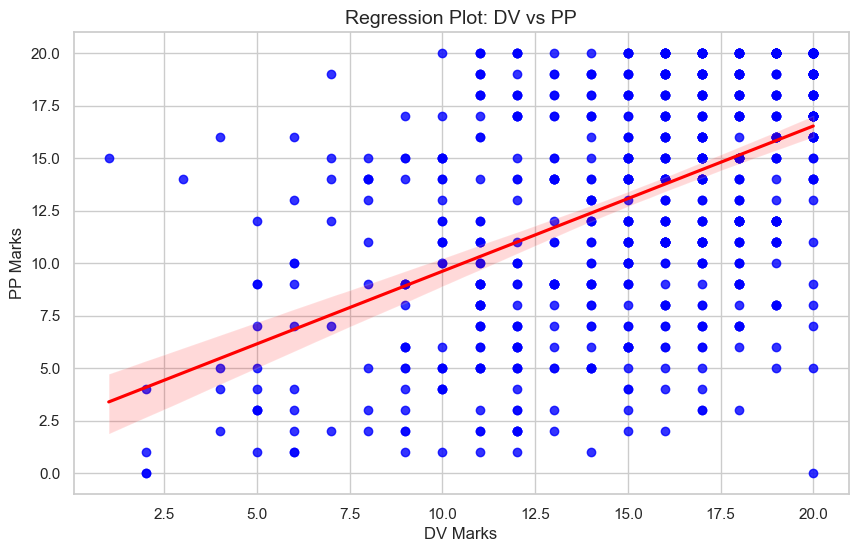

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(data=a, x='DV', y='PP', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Regression Plot: DV vs PP', fontsize=14)
plt.xlabel('DV Marks', fontsize=12)
plt.ylabel('PP Marks', fontsize=12)
plt.show()


It  visualizes the pairwise correlations between different columns in the columns_to_convert subset of the DataFrame. Each cell in the heatmap represents the correlation coefficient between the corresponding pair of subjects (columns).

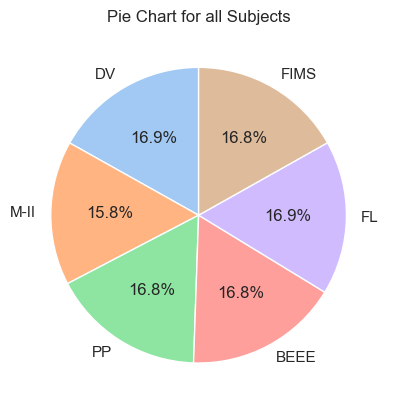

In [90]:
import seaborn as sns
import pandas as pd
subject_marks = a[['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']].gt(0).sum()
sns.set_context("notebook", rc={"figure.figsize": (7, 8)})
sns.set_style("whitegrid")
colors = sns.color_palette("pastel", len(subject_marks)) 
subject_marks.plot.pie(
    labels=subject_marks.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    title="Pie Chart for all Subjects",
    ylabel='',  
)

plt.show()


The pie chart will visually represent the number of non-zero marks for each of the listed subjects (DV, M-II, PP, BEEE, FL, FIMS) in the dataset. Each slice of the pie corresponds to a subject, and the size of each slice reflects the count of non-zero marks in that subject. 

<Figure size 800x500 with 0 Axes>

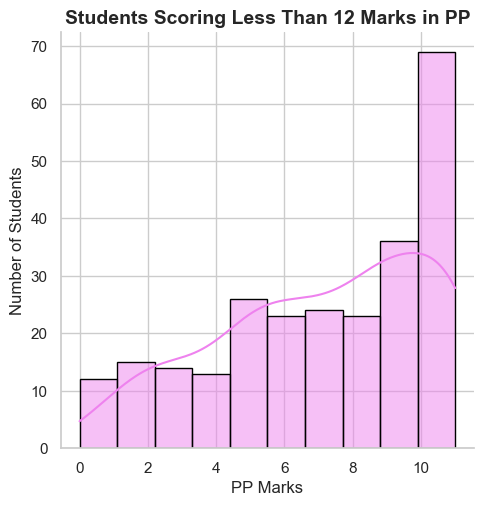

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
filtered_a = a[a['PP'] < 12]
plt.figure(figsize=(8, 5))
sns.displot(filtered_a['PP'], bins=10, kde=True, color='violet', edgecolor='black')
plt.title("Students Scoring Less Than 12 Marks in PP", fontsize=14, fontweight='bold')
plt.xlabel("PP Marks", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.show()


The histogram visualizes the distribution of 'PP' marks for students who scored less than 12. The x-axis shows the range of marks, divided into 10 bins, and the y-axis represents the number of students within each bin. This allows for a clear understanding of how many students have marks within specific intervals. 

In [92]:

top_performers = {
    subject: a.loc[a[subject].idxmax()]['S.NO']
    for subject in subjects
}
top_performers


{'DV': 12.0, 'M-II': 12.0, 'PP': 7.0, 'BEEE': 7.0, 'FL': 5.0, 'FIMS': 181.0}

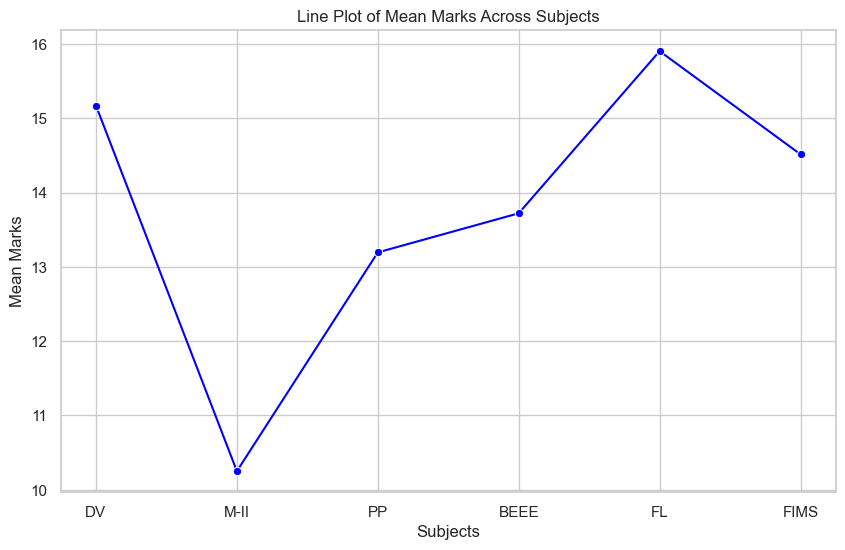

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
subjects = ['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']
mean_marks = a[subjects].mean() 
plt.figure(figsize=(10, 6))
sns.lineplot(x=subjects, y=mean_marks, marker='o', color='blue')
plt.title('Line Plot of Mean Marks Across Subjects')
plt.xlabel('Subjects')
plt.ylabel('Mean Marks')
plt.show()


The violin plot reveals the distribution, spread, and central tendency of marks for each subject, highlighting key differences and patterns in student performance. The width of the violin shape represents the density of marks at various levels

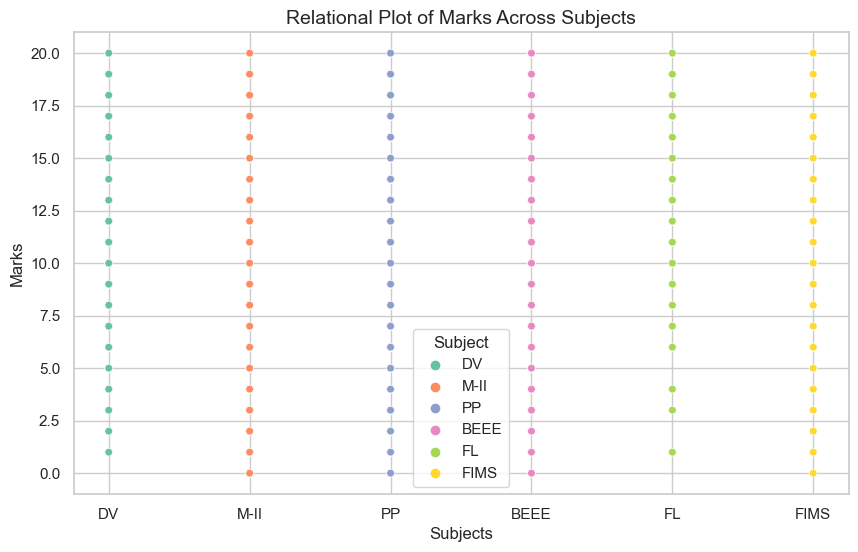

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
subjects = ['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']
data_melted = a[subjects].reset_index().melt(id_vars='index', var_name='Subject', value_name='Marks')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_melted, x='Subject', y='Marks', hue='Subject', palette='Set2', s=30)
plt.title('Relational Plot of Marks Across Subjects', fontsize=14)
plt.xlabel('Subjects', fontsize=12)
plt.ylabel('Marks', fontsize=12)
plt.show()


The strip plot provides a detailed view of the distribution of individual student marks across the six subjects ('DV', 'M-II', 'PP', 'BEEE', 'FL', and 'FIMS'). By plotting each student's marks as a dot, 

In [95]:
subject=["DV","M2","PP","BEEE","FL","FIMS"]

a["Bc"] = 0
for i, row in a.iterrows():
    bc = 0
    if row["DV"] < 10:
        bc+= 1
    if row["M-II"] < 10:
        bc += 1
    if row["PP"] < 10:
        bc += 1
    if row["BEEE"] < 10:
        bc+= 1
    if row["FL"] < 10:
        bc += 1
    if row["FIMS"] < 10:
        bc += 1
    a.at[i, "Bc"] = bc

a

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Bc
0,1.0,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,2
1,2.0,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,1
2,3.0,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,0
3,4.0,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,1
4,5.0,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,0
...,...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,2
714,0.0,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,3
715,0.0,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,1
716,0.0,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,3


The Bc column indicates how many subjects a student scored below 10 in. The more subjects a student has with scores under 10, the higher the value of Bc

In [96]:

a["Bc_DV"] = 0
a["Bc_M-II"] = 0
a["Bc_PP"] = 0
a["Bc_BEEE"] = 0
a["Bc_FL"] = 0
a["Bc_FIMS"] = 0
for i, row in a.iterrows():
    a.at[i, "Bc_DV"] = 1 if row["DV"] < 10 else 0
    a.at[i, "Bc_M-II"] = 1 if row["M-II"] < 10 else 0
    a.at[i, "Bc_PP"] = 1 if row["PP"] < 10 else 0
    a.at[i, "Bc_BEEE"] = 1 if row["BEEE"] < 10 else 0
    a.at[i, "Bc_FL"] = 1 if row["FL"] < 10 else 0
    a.at[i, "Bc_FIMS"] = 1 if row["FIMS"] < 10 else 0
a

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Bc,Bc_DV,Bc_M-II,Bc_PP,Bc_BEEE,Bc_FL,Bc_FIMS
0,1.0,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,2,0,1,0,1,0,0
1,2.0,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,1,0,0,0,0,0,1
2,3.0,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,0,0,0,0,0,0,0
3,4.0,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,1,0,1,0,0,0,0
4,5.0,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,2,0,1,1,0,0,0
714,0.0,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,3,0,1,1,0,0,1
715,0.0,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,1,0,1,0,0,0,0
716,0.0,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,3,0,1,1,1,0,0


The newly added columns—"Bc_DV," "Bc_M-II," "Bc_PP," "Bc_BEEE," "Bc_FL," and "Bc_FIMS"—indicate whether the student's score in each subject is below 10. A value of 1 means the student scored less than 10 in that subject, while 0 means the score was 10 or higher

In [97]:
backlog_counts = {
    "DV_Backlogs": (a["DV"] < 10).sum(),
    "M2_Backlogs": (a["M-II"] < 10).sum(),
    "PP_Backlogs": (a["PP"] < 10).sum(),
    "BEEE_Backlogs": (a["BEEE"] < 10).sum(),
    "FL_Backlogs": (a["FL"] < 10).sum(),
    "FIMS_Backlogs": (a["FIMS"] < 10).sum()
}

for subject, count in backlog_counts.items():
    print(f"{subject}: {count}")

DV_Backlogs: 66
M2_Backlogs: 320
PP_Backlogs: 186
BEEE_Backlogs: 165
FL_Backlogs: 26
FIMS_Backlogs: 93


The output provides a clear summary of the number of students who are facing difficulties in each subject, with the total number of backlogs in each subject displayed. If a subject shows a high backlog count, it may indicate that many students are struggling in that particular subject,

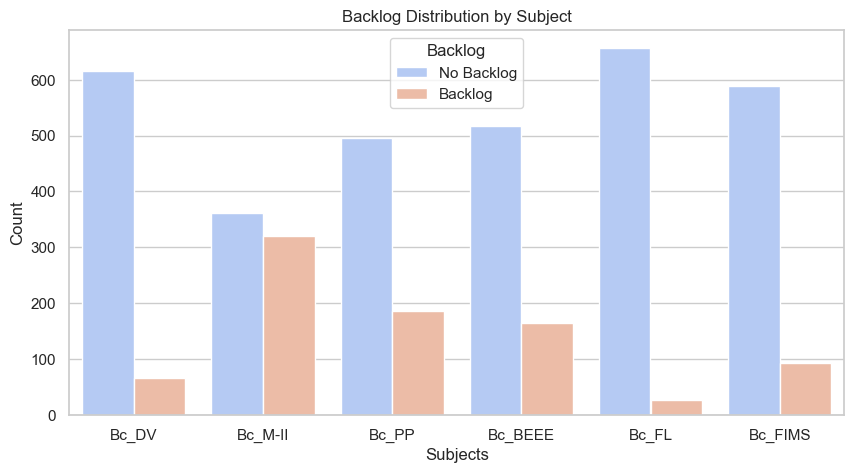

In [98]:
plt.figure(figsize=(10, 5))
melted_a = a[["Bc_DV", "Bc_M-II", "Bc_PP", "Bc_BEEE", "Bc_FL", "Bc_FIMS"]].melt(var_name="Subject", value_name="Backlog")
sns.countplot(data=melted_a, x="Subject", hue="Backlog", palette="coolwarm")
plt.title("Backlog Distribution by Subject")
plt.xlabel("Subjects")
plt.ylabel("Count")
plt.legend(title="Backlog", labels=["No Backlog", "Backlog"])
plt.show()

he output provides a clear summary of the number of students who are facing difficulties in each subject, with the total number of backlogs in each subject displayed. If a subject shows a high backlog count

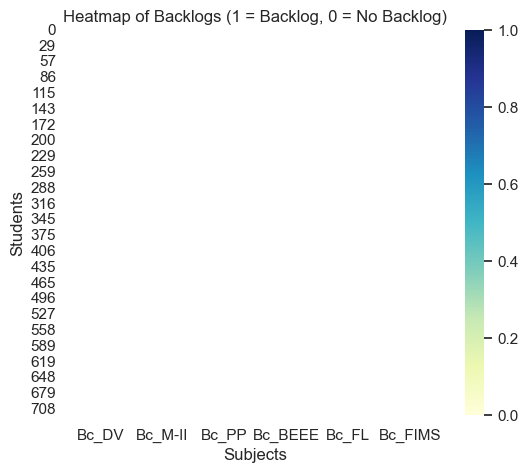

In [99]:
plt.figure(figsize=(6, 5))
sns.heatmap(a[["Bc_DV", "Bc_M-II", "Bc_PP", "Bc_BEEE", "Bc_FL", "Bc_FIMS"]], cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Heatmap of Backlogs (1 = Backlog, 0 = No Backlog)")
plt.xlabel("Subjects")
plt.ylabel("Students")
plt.show()

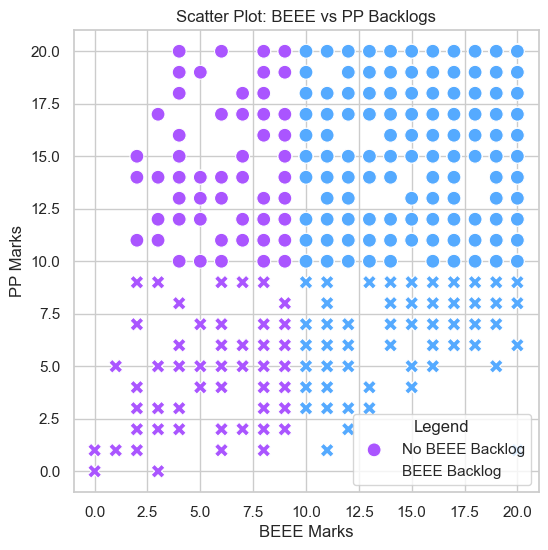

In [100]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=a, x="BEEE", y="PP", hue="Bc_BEEE", style="Bc_PP", palette="cool", s=100)
plt.title("Scatter Plot: BEEE vs PP Backlogs")
plt.xlabel("BEEE Marks")
plt.ylabel("PP Marks")
plt.legend(title="Legend", labels=["No BEEE Backlog", "BEEE Backlog"])
plt.show()

The scatter plot provides insights into how students' marks in "BEEE" correlate with their marks in "PP," with distinct visual differentiation for students with backlogs in either subject. Students without a backlog in "BEEE" are represented by one style, while those with a backlog are indicated by a different style, 

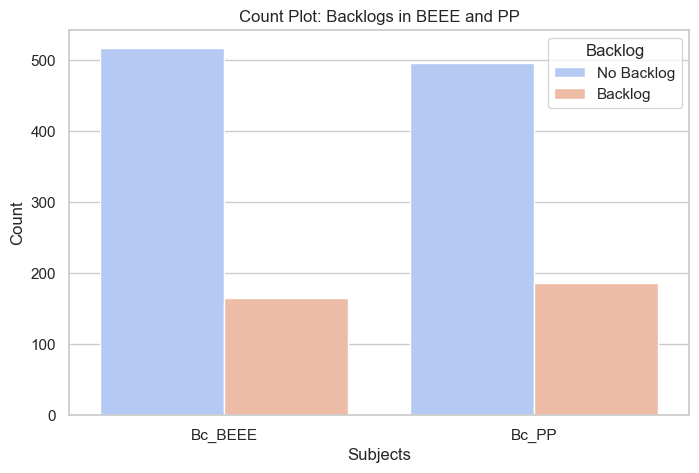

In [101]:
plt.figure(figsize=(8, 5))
melted_data = a[["Bc_BEEE", "Bc_PP"]].melt(var_name="Subject", value_name="Backlog")
sns.countplot(data=melted_data, x="Subject", hue="Backlog", palette="coolwarm")
plt.title("Count Plot: Backlogs in BEEE and PP")
plt.xlabel("Subjects")
plt.ylabel("Count")
plt.legend(title="Backlog", labels=["No Backlog", "Backlog"])
plt.show()

The count plot provides a clear comparison of the backlog distribution between the "BEEE" and "PP" subjects. Each bar represents the number of students with or without a backlog in each subject. 

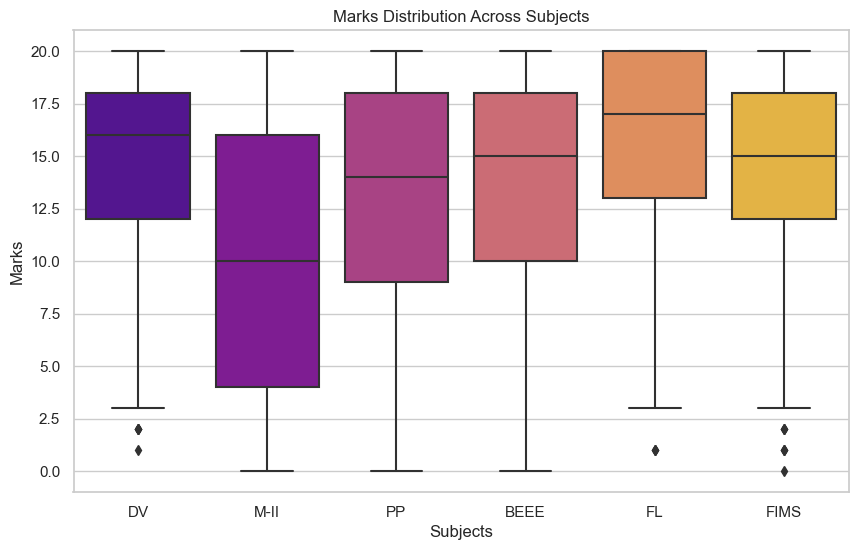

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=a[subjects], palette="plasma")
plt.title("Marks Distribution Across Subjects")
plt.xlabel("Subjects")
plt.ylabel("Marks")
plt.show()

The box plot offers a clear view of the spread of marks for each subject, with the central line in each box representing the median score

In [103]:

def assign_grade(row):

    total_bc = row["Bc_DV"] + row["Bc_M-II"] + row["Bc_PP"] + row["Bc_BEEE"] + row["Bc_FL"] + row["Bc_FIMS"]

    if total_bc == 0:
        return "A" 
    elif total_bc <= 2:
        return "B"  
    elif total_bc <= 4:
        return "C" 
    else:
        return "F" 
a["Grade"] = a.apply(assign_grade, axis=1)
a


,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Bc,Bc_DV,Bc_M-II,Bc_PP,Bc_BEEE,Bc_FL,Bc_FIMS,Grade
0,1.0,ALPHA,12.0,0.0,17.0,9.0,19.0,15.0,2,0,1,0,1,0,0,B
1,2.0,ALPHA,19.0,12.0,16.0,16.0,18.0,3.0,1,0,0,0,0,0,1,B
2,3.0,ALPHA,18.0,14.0,18.0,18.0,18.0,16.0,0,0,0,0,0,0,0,A
3,4.0,ALPHA,15.0,9.0,19.0,17.0,19.0,15.0,1,0,1,0,0,0,0,B
4,5.0,ALPHA,18.0,17.0,19.0,19.0,20.0,18.0,0,0,0,0,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.0,ZETA,19.0,8.0,8.0,19.0,17.0,18.0,2,0,1,1,0,0,0,B
714,0.0,ZETA,12.0,1.0,7.0,10.0,20.0,8.0,3,0,1,1,0,0,1,C
715,0.0,ZETA,17.0,6.0,14.0,14.0,17.0,18.0,1,0,1,0,0,0,0,B
716,0.0,ZETA,12.0,1.0,6.0,7.0,15.0,12.0,3,0,1,1,1,0,0,C


In [104]:
import pandas as pd
a = pd.read_excel("MIDMARKS.xlsx")

a['PP'] = pd.to_numeric(a['PP'], errors='coerce')
def prog_skills(pp):
    if pp >= 18:
        return "Very Good"
    elif 12 <= pp <= 17:
        return "Good"
    else:
        return "Poor"
    
a['Programming Skills'] = a['PP'].apply(prog_skills)
a

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Programming Skills
0,1.0,ALPHA,12,0,17.0,9,19,15,Good
1,2.0,ALPHA,19,12,16.0,16,18,3,Good
2,3.0,ALPHA,18,14,18.0,18,18,16,Very Good
3,4.0,ALPHA,15,9,19.0,17,19,15,Very Good
4,5.0,ALPHA,18,17,19.0,19,20,18,Very Good
...,...,...,...,...,...,...,...,...,...
713,NaN,ZETA,19,8,8.0,19,17,18,Poor
714,NaN,ZETA,12,1,7.0,10,20,8,Poor
715,NaN,ZETA,17,6,14.0,14,17,18,Good
716,NaN,ZETA,12,1,6.0,7,15,12,Poor


In [105]:

a['DV'] = pd.to_numeric(a['DV'], errors='coerce')
def analytical_skills(DV):
    if DV >= 18:
        return "Very Good"
    elif 12 <= DV <= 17:
        return "Good"
    else:
        return "Poor"
    
a['Analytical Skills'] = a['DV'].apply(analytical_skills)
a

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Programming Skills,Analytical Skills
0,1.0,ALPHA,12.0,0,17.0,9,19,15,Good,Good
1,2.0,ALPHA,19.0,12,16.0,16,18,3,Good,Very Good
2,3.0,ALPHA,18.0,14,18.0,18,18,16,Very Good,Very Good
3,4.0,ALPHA,15.0,9,19.0,17,19,15,Very Good,Good
4,5.0,ALPHA,18.0,17,19.0,19,20,18,Very Good,Very Good
...,...,...,...,...,...,...,...,...,...,...
713,NaN,ZETA,19.0,8,8.0,19,17,18,Poor,Very Good
714,NaN,ZETA,12.0,1,7.0,10,20,8,Poor,Good
715,NaN,ZETA,17.0,6,14.0,14,17,18,Good,Good
716,NaN,ZETA,12.0,1,6.0,7,15,12,Poor,Good


In [106]:

subjects = ['M-II', 'PP', 'BEEE', 'FL', 'FIMS']
subject_counts = {subject: (a[subject] == 20).sum() for subject in subjects}
highest_subject = max(subject_counts, key=subject_counts.get)
highest_count = subject_counts[highest_subject]
print("Count of students scoring 20 in each subject:")
for subject, count in subject_counts.items():
    print(f"{subject}: {count}")

print(f"\nSubject with the highest number of students scoring 20: {highest_subject} ({highest_count} students)")

Count of students scoring 20 in each subject:
M-II: 69
PP: 106
BEEE: 103
FL: 189
FIMS: 32

Subject with the highest number of students scoring 20: FL (189 students)


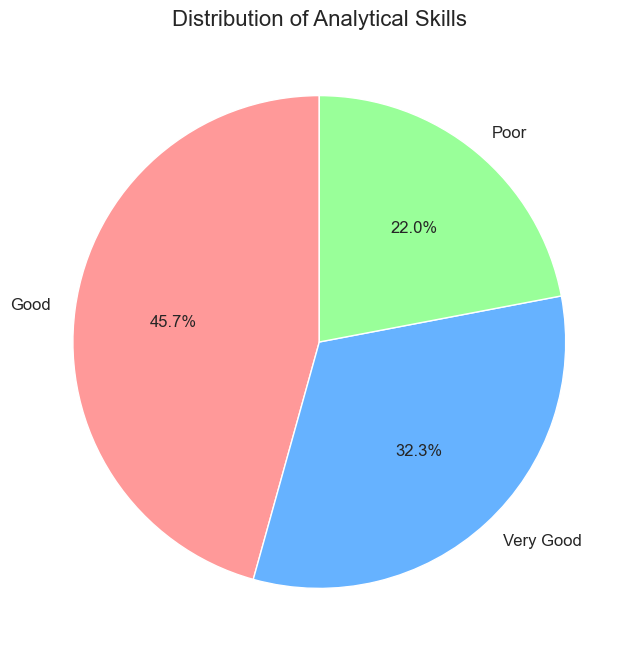

In [107]:
skill_counts = a['Analytical Skills'].value_counts()
plt.figure(figsize=(8, 8))
sns.set_theme(style="whitegrid")
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']  
plt.pie(skill_counts, labels=skill_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Distribution of Analytical Skills', fontsize=16)
plt.show()


we can observe the relative proportions of each skill level, with the percentage for each skill category displayed on the chart. For instance, if one skill level takes up a large portion of the pie, it suggests that most individuals in the dataset have that particular skill level. Conversely, smaller slices indicate less common skill levels. This visualization gives a clear view of how the "Analytical Skills" are distributed, helping to identify which skill levels are most prevalent among the individuals being analyzed.

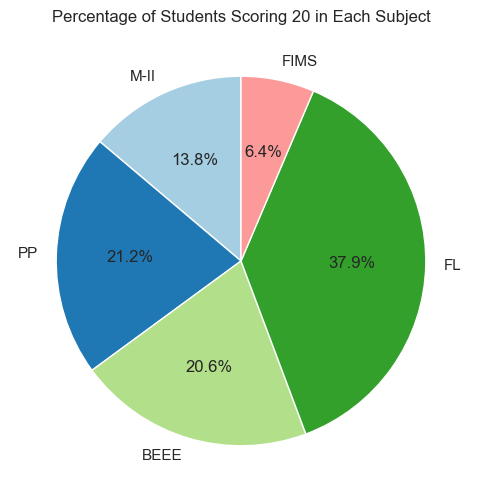

In [108]:
import matplotlib.pyplot as  plt
subjects = ['M-II', 'PP', 'BEEE', 'FL', 'FIMS']
subject_counts = {subject: (a[subject] == 20).sum() for subject in subjects}
counts = list(subject_counts.values())
labels = list(subject_counts.keys())
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Percentage of Students Scoring 20 in Each Subject")
plt.show()

The pie chart illustrates the distribution of students scoring 20 in each subject, with each slice representing the proportion of students who achieved this score. The chart is divided into five sections, each corresponding to one of the subjects. The percentage values displayed on the chart show the proportion of students who scored 20 in each subject, helping to compare the prevalence of this specific score across the subjects. If one subject takes up a larger portion of the pie, it indicates that a higher proportion of students scored 20 in that subject

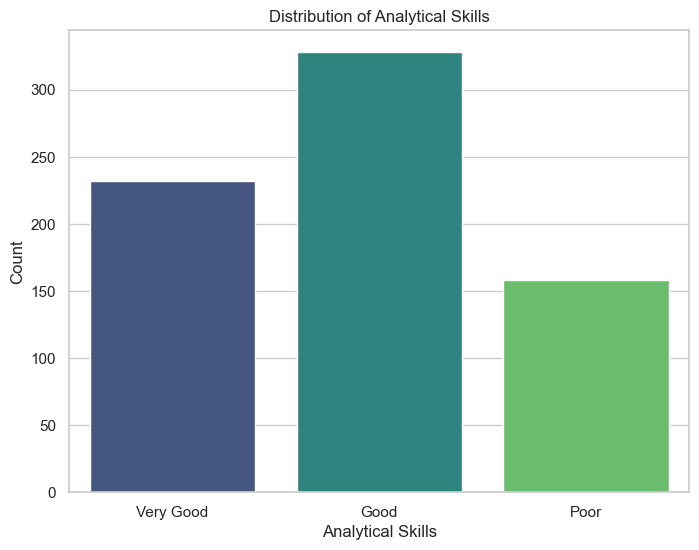

In [109]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Analytical Skills', data=a, palette="viridis", order=['Very Good', 'Good', 'Poor'])
plt.title('Distribution of Analytical Skills')
plt.xlabel('Analytical Skills')
plt.ylabel('Count')
plt.show()

The count plot displays the frequency of individuals categorized by their level of analytical skills: 'Very Good', 'Good', and 'Poor'. The x-axis represents the different skill levels, while the y-axis shows the count of individuals within each category. The color palette "viridis" is used to visually differentiate the bars. From the plot, we can observe the distribution of analytical skills across the dataset. For example, if the bar for 'Very Good' is significantly taller, it indicates that most individuals are categorized as having very good analytical skills. Conversely, a shorter bar for 'Poor' would suggest fewer individuals fall into the lower category

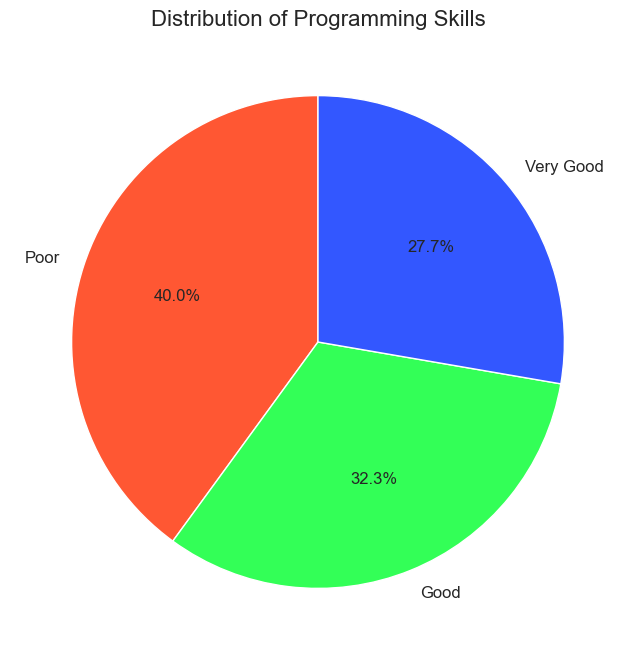

In [110]:
skill_counts = a['Programming Skills'].value_counts()
plt.figure(figsize=(8, 8))
sns.set_theme(style="whitegrid")
colors = ['#FF5733', '#33FF57', '#3357FF']  
plt.pie(skill_counts, labels=skill_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Distribution of Programming Skills', fontsize=16)
plt.show()


The pie chart shows the proportion of individuals categorized by their level of programming skills. Each slice represents a different skill level, with the size of the slice indicating the proportion of individuals in each category. The colors used in the chart (a gradient of red, green, and blue) differentiate the categories. The percentage for each skill level is displayed on the chart, giving a clear picture of how individuals are distributed across various programming skill levels. For example, if one skill level occupies a larger portion of the pie, it suggests that more individuals have that level of programming skill.

In [111]:
a.columns

Index(['S.NO', 'SECTION', 'DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS',
       'Programming Skills', 'Analytical Skills'],
      dtype='object')

In [112]:
alpha_a = a[a['SECTION'] == 'ALPHA']
alpha_a

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS,Programming Skills,Analytical Skills
0,1.0,ALPHA,12.0,0,17.0,9,19,15,Good,Good
1,2.0,ALPHA,19.0,12,16.0,16,18,3,Good,Very Good
2,3.0,ALPHA,18.0,14,18.0,18,18,16,Very Good,Very Good
3,4.0,ALPHA,15.0,9,19.0,17,19,15,Very Good,Good
4,5.0,ALPHA,18.0,17,19.0,19,20,18,Very Good,Very Good
...,...,...,...,...,...,...,...,...,...,...
85,86.0,ALPHA,3.0,4,14.0,13,18,13,Good,Poor
86,87.0,ALPHA,17.0,18,19.0,20,20,18,Very Good,Good
87,88.0,ALPHA,13.0,17,14.0,19,15,17,Good,Good
88,89.0,ALPHA,2.0,17,0.0,3,15,2,Poor,Poor


In [113]:
a.rename(columns={'M-II':'M2'},inplace=True)
a['S.NO'] = range(1, len(a) + 1)
a
a['SECTION'] = a['SECTION'].fillna('SIGMA') 
a['SECTION'] = a['SECTION'].replace('', 'SIGMA')
a

,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Programming Skills,Analytical Skills
0,1,ALPHA,12.0,0,17.0,9,19,15,Good,Good
1,2,ALPHA,19.0,12,16.0,16,18,3,Good,Very Good
2,3,ALPHA,18.0,14,18.0,18,18,16,Very Good,Very Good
3,4,ALPHA,15.0,9,19.0,17,19,15,Very Good,Good
4,5,ALPHA,18.0,17,19.0,19,20,18,Very Good,Very Good
...,...,...,...,...,...,...,...,...,...,...
713,714,ZETA,19.0,8,8.0,19,17,18,Poor,Very Good
714,715,ZETA,12.0,1,7.0,10,20,8,Poor,Good
715,716,ZETA,17.0,6,14.0,14,17,18,Good,Good
716,717,ZETA,12.0,1,6.0,7,15,12,Poor,Good


In [114]:
a['FL'] = a['FL'].fillna(0) 
a=a.dropna()

In [115]:
a['S.NO'] = range(1, len(a) + 1)
a

C:\Users\varik\AppData\Local\Temp\ipykernel_19680\1105519078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['S.NO'] = range(1, len(a) + 1)


,S.NO,SECTION,DV,M2,PP,BEEE,FL,FIMS,Programming Skills,Analytical Skills
0,1,ALPHA,12.0,0,17.0,9,19,15,Good,Good
1,2,ALPHA,19.0,12,16.0,16,18,3,Good,Very Good
2,3,ALPHA,18.0,14,18.0,18,18,16,Very Good,Very Good
3,4,ALPHA,15.0,9,19.0,17,19,15,Very Good,Good
4,5,ALPHA,18.0,17,19.0,19,20,18,Very Good,Very Good
...,...,...,...,...,...,...,...,...,...,...
713,694,ZETA,19.0,8,8.0,19,17,18,Poor,Very Good
714,695,ZETA,12.0,1,7.0,10,20,8,Poor,Good
715,696,ZETA,17.0,6,14.0,14,17,18,Good,Good
716,697,ZETA,12.0,1,6.0,7,15,12,Poor,Good


In [116]:
a.DV.mean()

15.050143266475645

In [117]:
a.DV.median()

16.0

Conclusion:

The dataset provides a comprehensive overview of midterm exam performance, highlighting the strengths and weaknesses of individual participants across different questions. The presence of missing values suggests that certain questions were left unanswered or data collection was incomplete. Analyzing the data can help identify areas where students struggle the most, allowing for targeted improvements in teaching and exam design. Overall, the dataset serves as a valuable resource for evaluating academic performance and enhancing learning strategies.